In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [66]:
# Load dataset
df = pd.read_csv('../data/sinais_com_label.csv')
df

,i,si1,si2,si3,si4,si5,g1,classe
0,1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000,2
1,2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530427,2
2,3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730745,3
3,4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679911,2
4,5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...,...,...
1495,1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467,1
1496,1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385011,3
1497,1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530704,1
1498,1499,12.640997,5.852639,1.707746,184.267283,14.256125,61.062546,3


In [67]:
''' Selection of features and labels (inputs and outputs) '''

# convert df to array
X = df.iloc[:, [3, 4, 5]].values 
Y = df.iloc[:, 7].values   

In [68]:
X

array([[  8.416754,  75.921057,  21.635259],
       [  8.72589 ,  63.813564,  19.718734],
       [  0.      , 197.210213,  19.045471],
       ...,
       [  4.768427, 143.261527,  21.843486],
       [  1.707746, 184.267283,  14.256125],
       [  4.745181, 196.803149,  11.875068]])

In [69]:
''' Split dataset into training and testing sets '''
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42, stratify=Y)

In [70]:
''' Data preprocessing: feature scaling and one-hot encoding of labels '''
scalar = StandardScaler() # standardization of features
x_train_scaled = scalar.fit_transform(x_train)  # fit and transform the training data
y_train_encoded = to_categorical(y_train - 1)  # one-hot encoding of labels

In [71]:
''' Network architecture'''
model = Sequential() # create a sequential model, feed-forward
model.add(Dense(32, input_dim=3, activation='relu')) # hidden layer 1 with 32 neurons and ReLU(Rectified Linear Unit) activation
model.add(Dropout(0.2)) # dropout layer with 20% dropout rate to prevent overfitting
model.add(Dense(16, activation='relu')) # hidden layer 2 with 8 neurons and relu activation
model.add(Dense(4, activation='softmax')) # output layer with 4 neurons and softmax activation

In [72]:
''' Compile the model and train it '''
class_weights = {
    0: 2.5,  # Class 1 (Critico) - 2.5x more penalty for mistakes
    1: 1.5,  # Class 2 (Instavel) - 1.5x more penalty
    2: 1.0,  # Class 3 (Potencialmente Estavel) - Base weight
    3: 0.8   # Class 4 (Estavel) - Less penalty
}

print("Weights for Training:", class_weights)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
history = model.fit(epochs=80, batch_size=16, validation_split=0.1, x=x_train_scaled, y=y_train_encoded, class_weight=class_weights)

Weights for Training: {0: 2.5, 1: 1.5, 2: 1.0, 3: 0.8}
Epoch 1/80
68/68 [==============================] - 1s 5ms/step - loss: 1.8731 - accuracy: 0.4231 - precision_4: 0.5385 - recall_4: 0.0065 - val_loss: 1.2038 - val_accuracy: 0.5417 - val_precision_4: 0.4000 - val_recall_4: 0.0167
Epoch 2/80
68/68 [==============================] - 0s 2ms/step - loss: 1.5927 - accuracy: 0.5574 - precision_4: 0.6000 - recall_4: 0.1861 - val_loss: 1.0706 - val_accuracy: 0.5417 - val_precision_4: 0.5750 - val_recall_4: 0.3833
Epoch 3/80
68/68 [==============================] - 0s 2ms/step - loss: 1.4479 - accuracy: 0.5620 - precision_4: 0.6468 - recall_4: 0.3815 - val_loss: 0.9854 - val_accuracy: 0.5667 - val_precision_4: 0.6329 - val_recall_4: 0.4167
Epoch 4/80
68/68 [==============================] - 0s 2ms/step - loss: 1.3765 - accuracy: 0.5852 - precision_4: 0.6562 - recall_4: 0.4259 - val_loss: 0.9514 - val_accuracy: 0.5417 - val_precision_4: 0.6125 - val_recall_4: 0.4083
Epoch 5/80
68/68 [=======

In [73]:
''' Evaluate the model on the test set '''
loss, accuracy, precision, recall = model.evaluate(scalar.transform(x_test), to_categorical(y_test - 1))
print(f'Test Loss: {loss}')
previsions = np.argmax(model.predict(scalar.transform(x_test)), axis=-1) + 1
print(previsions)
print(f'Test Accuracy: {accuracy}')
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')

10/10 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8333 - precision_4: 0.8316 - recall_4: 0.8233
Test Loss: 0.38948187232017517
10/10 [==============================] - 0s 1ms/step
[2 2 2 2 2 2 1 2 2 3 3 3 3 2 1 2 1 3 2 2 2 3 2 3 2 3 2 2 2 2 2 2 2 2 2 2 3
 3 2 2 3 2 2 2 2 3 3 2 2 1 3 2 1 3 3 2 2 2 2 3 2 2 2 2 2 3 2 3 2 2 3 2 2 2
 2 2 2 2 3 2 3 2 2 1 3 2 2 3 2 2 1 1 2 2 2 1 1 2 2 1 2 1 3 2 1 2 2 3 2 2 1
 2 2 2 1 2 2 1 2 2 1 2 3 3 3 3 3 2 2 2 2 2 1 1 1 1 2 1 1 1 2 3 1 1 1 2 3 3
 3 2 1 2 2 3 2 1 2 2 2 2 2 2 2 2 2 3 1 3 2 2 3 2 3 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 1 2 1 3 3 2 2 2 1 2 2 3 3 1 2 1 2 2 2 3 2 1 2 1 3 4 2 3 2 2 1 2
 3 2 2 2 1 4 2 3 3 2 2 2 2 3 2 2 3 2 2 3 2 2 1 2 2 2 3 3 2 2 2 2 2 2 2 3 1
 2 1 2 3 2 2 2 2 1 3 2 2 3 3 2 3 3 2 3 2 2 1 2 1 1 2 3 2 2 2 3 2 3 2 3 2 2
 3 2 2 2]
Test Accuracy: 0.8333333134651184
Test Precision: 0.8316498398780823
Test Recall: 0.8233333230018616


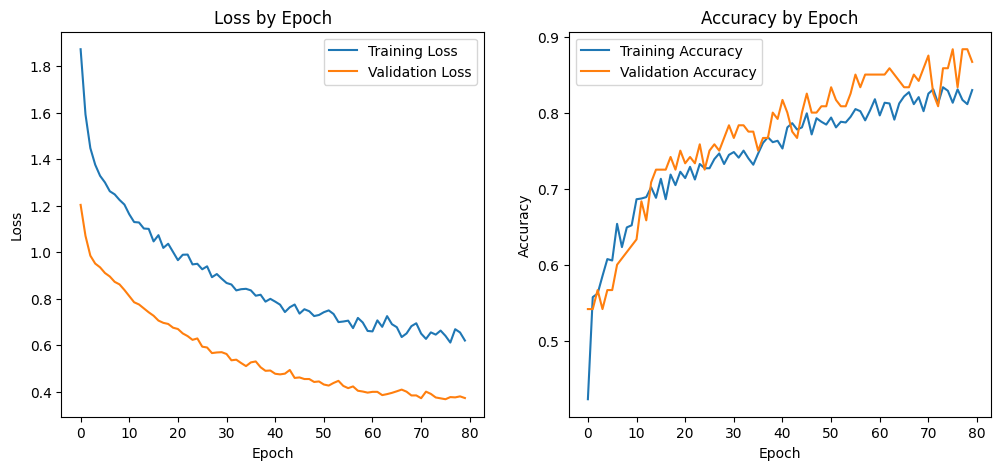

In [74]:
# 1. Graph of Loss Function
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Graph of Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
print("--- Evaluate Results ---")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision (Average): {precision:.4f}")
print(f"Recall (Average Sensitivity): {recall:.4f}")

# Predictions are needed for the classification_report and Confusion Matrix
probabilities = model.predict(scalar.transform(x_test), verbose=0)
predictions = np.argmax(probabilities, axis=-1) + 1 # Convertendo de volta para classes 1, 2, 3, 4

print("\n--- Detailed Class Report (Classification Report) ---")
# The classes are: 1=crítico, 2=instável, 3=potencialmente estável, 4=estável
target_names = ['1 - Crítico', '2 - Instável', '3 - Pot. Estável', '4 - Estável']
print(classification_report(y_test, predictions, target_names=target_names))

--- Evaluate Results ---
Loss: 0.3895
Accuracy: 83.33%
Precision (Average): 0.8316
Recall (Average Sensitivity): 0.8233

--- Detailed Class Report (Classification Report) ---
                  precision    recall  f1-score   support

     1 - Crítico       0.79      0.79      0.79        47
    2 - Instável       0.83      0.91      0.87       166
3 - Pot. Estável       0.87      0.74      0.80        81
     4 - Estável       1.00      0.33      0.50         6

        accuracy                           0.83       300
       macro avg       0.87      0.69      0.74       300
    weighted avg       0.84      0.83      0.83       300




--- Confusion Matrix ---
[[ 37  10   0   0]
 [ 10 151   5   0]
 [  0  21  60   0]
 [  0   0   4   2]]


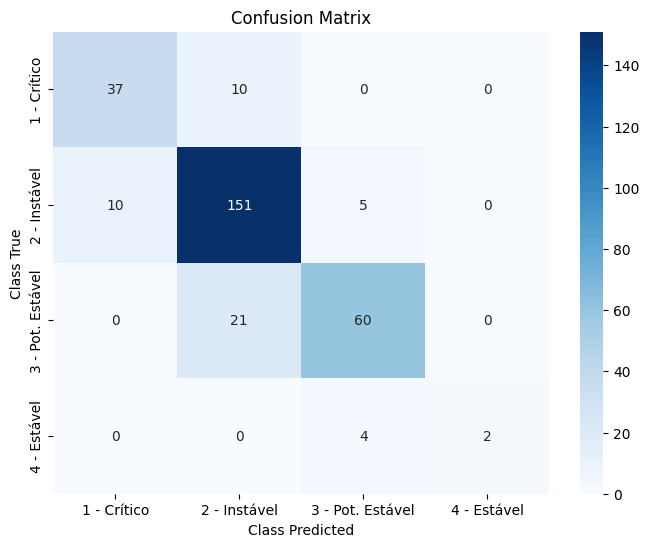

In [76]:
# Matrix calculation
cm = confusion_matrix(y_test, predictions)

print("\n--- Confusion Matrix ---")
print(cm)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Class Predicted')
plt.ylabel('Class True')
plt.show()

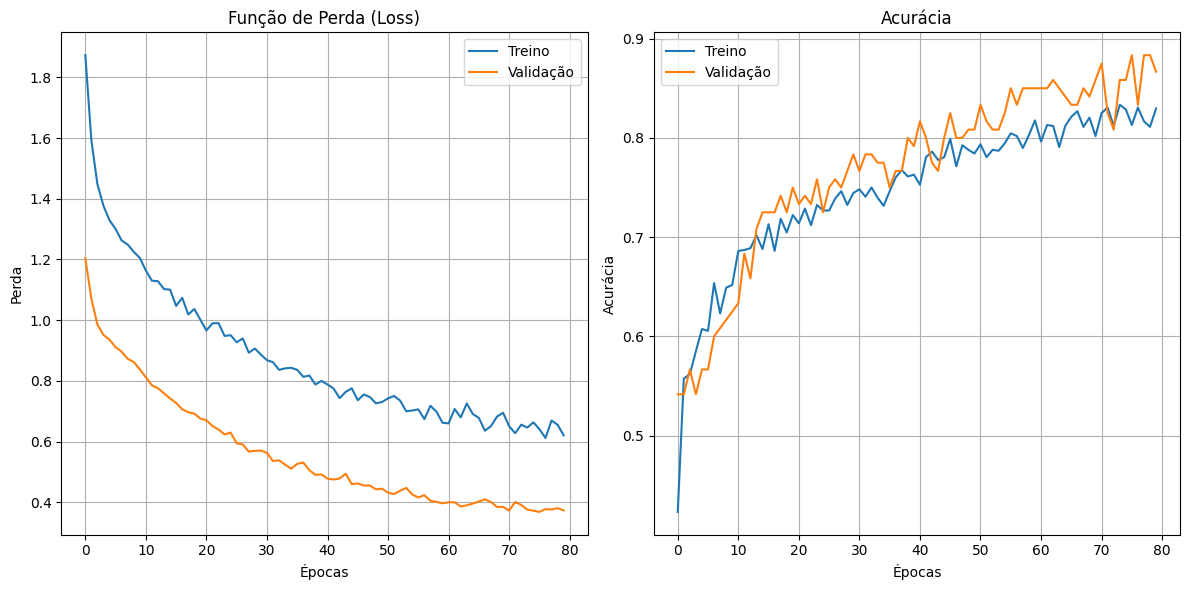

In [77]:
import matplotlib.pyplot as plt

# Extrair as métricas do histórico de treinamento
history_dict = history.history

# --- LOSS (função de perda) ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Treino')
plt.plot(history_dict['val_loss'], label='Validação')
plt.title('Função de Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

# --- ACCURACY (acurácia) ---
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Treino')
plt.plot(history_dict['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
